# MBTA TREEM Project Energy Consumption Data Exploration

In [1]:
#load data and related packages
library(ggplot2)
library(dplyr)
library(lubridate)
library(xts)
library(reshape2)
library(RColorBrewer)
library(numform)
library(gcookbook)
library(tidyverse)
wholedata_frame <- read.csv("../../data/raw/energy-consumption-08-20.csv",header = TRUE
                           #, na.strings =0
                          )

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'numform' was built under R version 3.6.3"

Attaching package: 'numform'


The following obj

In [177]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.1     v purrr   0.3.3
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x forcats::as_factor()     masks numform::as_factor()
x numform::collapse()      masks dplyr::collapse()
x lubridate::date()        masks base::date()
x dplyr::filter()          masks stats::filter()
x xts::first()             masks dplyr::first()
x lubridate::intersect()   masks base::intersect()
x dplyr::lag()           

## Daily time series plot

In [4]:
#generate time series plots
mycolors<-c(brewer.pal(4,"Set1"),brewer.pal(4, "Paired"),brewer.pal(4,"Set2"))
png("../../figures/figures for report/Time series daily.png",height= 2000,width=6000,res=360)
wholedata_frame <- wholedata_frame %>%
  # na.omit() %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y"))
ggplot(wholedata_frame,aes(x = Date, y = Total.Daily.Load,color=factor(WJ))) +
geom_point() + theme_bw(base_size = 15) + scale_y_continuous(limits=c(750,1800))+
theme_bw() + scale_color_manual("WJ",values = mycolors,labels=c("Weekend", "Weekday"))+
theme(axis.text=element_text(size=20),axis.title.x = element_text(size = 25),
      axis.title.y = element_text(size = 25),title= element_text(size = 25),
      legend.text = element_text(size=20),
      axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  labs( y = "Energy consumption (MWh)",
       x = "Date") +
    guides(color=guide_legend(title=NULL))+
   scale_x_date(date_breaks ="1 year",date_labels = "%Y-%m")
dev.off()

Warning message:
"Removed 36 rows containing missing values (geom_point)."


png 
  2

In [21]:
# Time series facet plot
png("Time series facet plot.png",height= 2000,width=5000,res=360)
wholedata_frame  %>%
  na.omit() %>%
  ggplot(aes(x = Day.of.Year, y = Total.Daily.Load)) +
  geom_point(color = "darkorchid4") +
  facet_wrap( ~wholedata_frame$Year ) +
  labs(title = "Energy consumption of MBTA Rapid Transit",
       subtitle = "Use facets to plot by a variable - year in this case",
       y = "Energy consumption (kWh)",
       x = "Day") + theme_bw(base_size = 15)
dev.off()

png 
  2

In [2]:
df_month_melt = melt(wholedata_frame, id.vars = c("Year","Month"), measure.vars = c("Total.Daily.Load"))

In [4]:
df_month_melt 

Year,Month,variable,value
<int>,<int>,<fct>,<dbl>
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0
2008,1,Total.Daily.Load,0


In [3]:
df_month_melt_agg = aggregate(df_month_melt$value,list(df_month_melt$Year, df_month_melt$Month),sum)

In [10]:
#Time Series plot by month
png(file="../../figures/figures for report/Month box plot.png", height= 3500,width=6000,res=360)
df_month_melt_agg  %>%
ggplot(aes(x = month.abb[Group.2], y = x/1000,fill=factor(Group.2)))+
  geom_boxplot() +
ylim(20,50) +
  #facet_wrap(~ wholedata_frame$Year, nrow = 3) +
  labs(#title = "Total Monthly Energy comsumption",
       #subtitle = "Data plotted by year",
       y = "Energy consumption (GWh)",
       x = "Month") + 
 #geom_text(aes(label = Group.1),size = 15) + 
  theme_bw() + scale_fill_manual("Month",values= mycolors) + scale_x_discrete(limits = month.abb)+
  theme(#strip.text=element_text(size=50),
      axis.text=element_text(size=20),axis.title.x = element_text(size = 25),axis.title.y = element_text(size = 25),title= element_text(size = 25)) + 
  guides(fill=FALSE)
dev.off()

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."


png 
  2

In [4]:
#generate annual energy consumption table
mean_year=tapply(wholedata_frame$Total.Daily.Load,wholedata_frame$Year,mean,na.rm =TRUE)
sum_year=tapply(wholedata_frame$Total.Daily.Load,wholedata_frame$Year,sum,na.rm =TRUE)
max_year=tapply(wholedata_frame$Total.Daily.Load,wholedata_frame$Year,max,na.rm =TRUE)
min_year=tapply(wholedata_frame$Total.Daily.Load,wholedata_frame$Year,min,na.rm =TRUE)
median_year=tapply(wholedata_frame$Total.Daily.Load,wholedata_frame$Year,median,na.rm =TRUE)
# onpeak_year=tapply(wholedata_frame$on.peak,wholedata_frame$Year,sum,na.rm =TRUE)
# offpeak_year=tapply(wholedata_frame$off.peak,wholedata_frame$Year,sum,na.rm =TRUE)
Year_table=data.frame(year=c(2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020),mean=mean_year,sum=sum_year,max=max_year,min=min_year,median=median_year
#                       ,onpeak=onpeak_year,offpeak=offpeak_year
                     )
Year_table1 = Year_table[-1,]
Year_table1
#generate annual energy consumption bar plot
png(file="../../figures/annual energy consumption line plot.png", height= 2500,width=7000,res=180)
ggplot(data=Year_table1, aes(x = factor(year), y = sum/1000, group = 1))+ 
  geom_line( color = "red", size = 5)+
  geom_point( color = "darkBlue", shape = 23, size = 20) +
 # geom_text(aes(label = round(sum/1000, 1)),size = 30) +
 labs(#title = "Annual Energy consumption of MBTA Rapid Transit ", 
      y = "Energy consumption (GWh)",x = "Year") + 
  theme_bw() +
 theme(axis.text=element_text(size=50),axis.title.x = element_text(size = 60),axis.title.y = element_text(size = 60),title= element_text(size = 20)
      #panel.grid.major = element_line(size = 0.5, linetype = 'solid',colour = "Black")
      ) + 
 # scale_fill_manual("year",values= mycolors) +
 guides(fill=FALSE)
dev.off()

,year,mean,sum,max,min,median
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,2009,1178.238,430057.0,1655.613,835.110,1133.982
2010,2010,1177.562,429810.1,1599.186,893.418,1157.462
2011,2011,1179.360,430466.4,1657.292,740.180,1154.546
2012,2012,1153.191,422068.1,1486.984,849.733,1158.397
2013,2013,1196.392,436682.9,1587.326,869.037,1177.588
2014,2014,1196.107,436579.2,1669.817,876.948,1156.778
2015,2015,1149.656,419624.3,1597.792,833.849,1118.276
2016,2016,1142.173,418035.2,1542.008,831.458,1120.059
2017,2017,1144.280,417662.3,1588.161,849.350,1111.108


png 
  2

In [19]:
wholedata_frame

,X,WJ,Date,Year,Month,Day.of.Month,Day.of.Year,Hour.1,Hour.2,Hour.3,...,Hour.19,Hour.20,Hour.21,Hour.22,Hour.23,Hour.24,Total.Daily.Load,on.peak,off.peak,TAVG
,<int>,<int>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
367,367,0,2009-01-01,2009,1,1,1,76.353,74.555,69.647,...,68.596,68.224,67.343,67.256,67.210,66.241,1600.212,265.248,1334.964,12.5
368,368,0,2009-01-02,2009,1,2,2,64.638,57.381,55.696,...,69.902,64.802,62.062,61.031,61.225,58.939,1547.151,301.619,1245.532,24.0
369,369,1,2009-01-03,2009,1,3,3,55.865,48.374,46.659,...,61.690,60.755,59.600,60.629,60.163,59.440,1374.963,234.510,1140.453,29.0
370,370,1,2009-01-04,2009,1,4,4,56.272,49.135,48.036,...,56.616,56.362,55.003,56.269,56.032,55.832,1298.538,223.299,1075.239,30.0
371,371,0,2009-01-05,2009,1,5,5,53.368,47.039,44.416,...,68.755,64.032,59.391,58.658,58.341,57.924,1429.619,273.158,1156.461,33.0
372,372,0,2009-01-06,2009,1,6,6,53.578,44.545,42.242,...,66.444,61.828,57.771,56.863,57.380,54.572,1403.528,272.919,1130.609,30.5
373,373,0,2009-01-07,2009,1,7,7,53.819,50.624,51.749,...,72.182,66.223,61.278,60.620,62.008,60.814,1527.052,291.287,1235.765,33.5
374,374,0,2009-01-08,2009,1,8,8,57.544,50.397,50.441,...,71.374,66.454,61.955,62.013,63.152,60.838,1479.261,269.715,1209.546,32.5
375,375,0,2009-01-09,2009,1,9,9,57.890,50.337,47.941,...,74.010,68.511,65.108,62.079,62.524,61.136,1531.058,289.567,1241.491,24.5


In [18]:
wholedata_frame = wholedata_frame[wholedata_frame$Year!=2008,]

In [20]:
#generate the month energy consumption table
sum_month=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$Month),sum,na.rm =TRUE)
mean_month=aggregate(sum_month$x,list(sum_month$Group.2),mean)
max_month=aggregate(sum_month$x,list(sum_month$Group.2),max)
min_month=aggregate(sum_month$x,list(sum_month$Group.2),min)
median_month=aggregate(sum_month$x,list(sum_month$Group.2),median)
Month_table=data.frame(month=c('January','February','March','April','May','June','July','August','September','October','November','December'),mean=mean_month$x,max=max_month$x,min=min_month$x,median=median_month$x)
Month_table

month,mean,max,min,median
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
January,42653.09,46225.32,38666.68,42495.70
February,38203.05,40844.29,35766.88,38481.13
March,38676.16,41652.02,33597.76,38872.87
April,33374.59,34494.05,30105.90,33472.67
May,32149.68,33407.19,29158.05,32324.05
June,31781.32,33337.88,29154.43,31977.87
July,34292.89,36004.47,32095.16,34386.67
August,33917.68,35595.26,31668.98,33908.49
September,31629.52,32853.44,29853.77,31613.82


In [17]:
sum_month2 = aggregate(sum_month$x,list(sum_month$Group.2),sum)

In [12]:
#generate the monthly energy consumption table
mean_monthy=aggregate(sum_month$x,list(sum_month$Group.1),mean)
max_monthy=aggregate(sum_month$x,list(sum_month$Group.1),max)
min_monthy=aggregate(sum_month$x,list(sum_month$Group.1),min)
median_monthy=aggregate(sum_month$x,list(sum_month$Group.1),median)
monthy_table=data.frame(year=c(2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020),mean=mean_monthy$x,max=max_monthy$x,min=min_monthy$x,median=median_monthy$x)
monthy_table

year,mean,max,min,median
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008,32437.57,41490.00,0.00,34067.75
2009,35838.08,46225.32,31189.00,34145.62
2010,35817.51,43516.56,32853.44,34264.14
2011,35872.20,45102.56,32338.28,34436.90
2012,35172.34,40048.80,32285.47,35204.17
2013,36390.25,42713.29,32263.06,35059.30
2014,36381.60,45371.57,32090.10,34737.33
2015,34968.69,44246.38,30496.83,33618.01
2016,34836.27,42026.32,31007.11,33865.27


In [38]:
#Fit the month energy consumption versus weather curve 
weather_month=aggregate(wholedata_frame$TAVG ,list(wholedata_frame$Year,wholedata_frame$Month),mean)
weather_month$EN=sum_month$x
is.na(weather_month) <- !weather_month
weather_month=na.omit(weather_month)
weather_month = weather_month[order(weather_month$x),]
weather_month=weather_month[-1,]
quadratic.model <-lm(EN/1000 ~ poly(weather_month$x, 2),data=weather_month)
summary(quadratic.model)
xnew <- data.frame(ATV = seq(min(weather_month$x), max(weather_month$x)))
fitted_values <- predict(quadratic.model, newdata = xnew)
weather_month$fittedvalue=fitted_values
# weather plot
png("month energy consumption versus weather curve.png",height= 1500,width=2000, res=120)
ggplot(data=weather_month, mapping=aes(x=x, y=EN/1000, group=1))+
 geom_point(aes(color=factor(Group.1)),size=2.5)+geom_path(data=weather_month,mapping=aes(x=x, y=fittedvalue),col="darkorange2",size= 2)+
 theme(axis.text=element_text(size=20),axis.title.x = element_text(size = 25),axis.title.y = element_text(size = 25),title= element_text(size = 25))+
 labs(title ="Monthly energy consumption versus temperature", y = "Energy consumption (MWh)", x = "Temperature (F)"，col="Year")+
 theme(legend.text=element_text(size=25)) 
dev.off() 


Call:
lm(formula = EN/1000 ~ poly(weather_month$x, 2), data = weather_month)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7379 -0.8902  0.1719  0.8349  2.6265 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                35.3497     0.1026  344.46   <2e-16 ***
poly(weather_month$x, 2)1 -33.7220     1.2229  -27.58   <2e-16 ***
poly(weather_month$x, 2)2  24.6476     1.2229   20.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.223 on 139 degrees of freedom
Multiple R-squared:  0.8935,	Adjusted R-squared:  0.892 
F-statistic: 583.3 on 2 and 139 DF,  p-value: < 2.2e-16


Warning message:
"'newdata' had 54 rows but variables found have 142 rows"


png 
  2

In [14]:
#generate the daily consumption table
mean_day=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$WJ),mean)
mean_weekend=mean_day[mean_day$Group.2==1,]
mean_weekday=mean_day[mean_day$Group.2==2,]
max_day=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$WJ),max)
max_weekend=max_day[mean_day$Group.2==1,]
max_weekday=max_day[mean_day$Group.2==2,]
min_day=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$WJ),min)
min_weekend=min_day[min_day$Group.2==1,]
min_weekday=min_day[min_day$Group.2==2,]
median_day=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$WJ),median)
median_weekend=median_day[median_day$Group.2==1,]
median_weekday=median_day[median_day$Group.2==2,]
Dailydata=data.frame(year=c(2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020),Weekdaymean=mean_weekday,Weekendmean=mean_weekend,Weekdaymax=max_weekday,Weekendmax=max_weekend,Weekdaymin=min_weekday,Weekendmin=min_weekend,Weekdaymedian=median_weekday,weekendmedian=median_weekend)
Dailydata

,year,Weekdaymean.Group.1,Weekdaymean.Group.2,Weekdaymean.x,Weekendmean.Group.1,Weekendmean.Group.2,Weekendmean.x,Weekdaymax.Group.1,Weekdaymax.Group.2,Weekdaymax.x,...,Weekdaymin.x,Weekendmin.Group.1,Weekendmin.Group.2,Weekendmin.x,Weekdaymedian.Group.1,Weekdaymedian.Group.2,Weekdaymedian.x,weekendmedian.Group.1,weekendmedian.Group.2,weekendmedian.x
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,...,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
14,2008,2008,2,NA,2008,1,NA,2008,2,NA,...,NA,2008,1,NA,2008,2,NA,2008,1,NA
15,2009,2009,2,1225.466,2009,1,1059.714,2009,2,1655.613,...,892.309,2009,1,835.110,2009,2,1150.505,2009,1,1002.6140
16,2010,2010,2,1219.607,2010,1,1072.044,2010,2,1599.186,...,927.119,2010,1,893.418,2010,2,1173.756,2010,1,1028.3220
17,2011,2011,2,1219.254,2011,1,1080.575,2011,2,1657.292,...,977.000,2011,1,740.180,2011,2,1172.318,2011,1,1042.1620
18,2012,2012,2,1197.476,2012,1,1043.111,2012,2,1486.984,...,895.395,2012,1,849.733,2012,2,1184.686,2012,1,1023.3990
19,2013,2013,2,1244.650,2013,1,1075.282,2013,2,1587.326,...,885.181,2013,1,869.037,2013,2,1198.634,2013,1,1029.6665
20,2014,2014,2,1242.678,2014,1,1079.233,2014,2,1669.817,...,965.858,2014,1,876.948,2014,2,1181.995,2014,1,1019.6090
21,2015,2015,2,1191.135,2015,1,1045.560,2015,2,1597.792,...,889.826,2015,1,833.849,2015,2,1138.538,2015,1,967.9965
22,2016,2016,2,1185.079,2016,1,1035.519,2016,2,1542.008,...,901.137,2016,1,831.458,2016,2,1140.075,2016,1,979.8790


In [42]:
# generate hourly profiles
HDdata=data.frame(year=wholedata_frame$Year,Hour1=wholedata_frame$Hour.1,Hour2=wholedata_frame$Hour.2,Hour3=wholedata_frame$Hour.3,Hour4=wholedata_frame$Hour.4,Hour5=wholedata_frame$Hour.5,Hour6=wholedata_frame$Hour.6,Hour7=wholedata_frame$Hour.7,Hour8=wholedata_frame$Hour.8,Hour9=wholedata_frame$Hour.9,Hour10=wholedata_frame$Hour.10,Hour11=wholedata_frame$Hour.11,Hour12=wholedata_frame$Hour.12,Hour13=wholedata_frame$Hour.13,Hour14=wholedata_frame$Hour.14,Hour15=wholedata_frame$Hour.15,Hour16=wholedata_frame$Hour.16,Hour17=wholedata_frame$Hour.17,
                                Hour18=wholedata_frame$Hour.18,Hour19=wholedata_frame$Hour.19,Hour20=wholedata_frame$Hour.20,Hour21=wholedata_frame$Hour.21,Hour22=wholedata_frame$Hour.22,Hour23=wholedata_frame$Hour.23,Hour24=wholedata_frame$Hour.24)
colnames(HDdata)=c("year","1AM","2AM","3AM","4AM","5AM","6AM","7AM","8AM","9AM","10AM","11AM","12PM","1PM","2PM","3PM","4PM","5PM","6PM","7PM","8PM","9PM","10PM","11PM","12AM")
HDdata[HDdata == 0] <- NA
head(HDdata)
HDdataprofile=aggregate(HDdata[,2:25], list(HDdata$year),mean,na.action=TRUE)
names(HDdataprofile)[1]="Year"
HDdataprofile_melt=melt(HDdataprofile,id.vars="Year")
png("hourly profile.png",height=900,width=1500,res=100)
ggplot(data=HDdataprofile_melt, mapping=aes(x=variable, y=value, group=Year))+
geom_line(aes(color=factor(Year)),size=2,alpha=0.5)+geom_point(aes(color=factor(Year)),alpha=0.6)+
 scale_color_manual("Year",values= mycolors )+
 theme(axis.text=element_text(size=20),axis.title.x = element_text(size = 25),
      axis.title.y = element_text(size = 25),title= element_text(size = 25),axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))+
     geom_vline(xintercept = c(8,23),linetype=5,col="darkgrey",size=2,alpha=0.8)+
    labs(title = "Average hourly energy consumption profile of MBTA Rapid Transit", y = "Energy consumption (kWh)", x = "Hour")+
    scale_y_continuous(limits=c(25,60))+
    theme(legend.text=element_text(size=25))
dev.off()

,year,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,12AM
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2008,53.906,45.148,43.549,42.726,42.885,51.740,64.278,70.981,71.347,...,60.094,63.465,68.033,70.979,68.543,62.353,58.906,56.426,54.681,52.731
2,2008,48.805,41.102,39.118,39.661,40.067,47.141,52.858,53.201,53.416,...,54.697,57.129,56.649,57.899,56.662,53.848,54.176,53.518,53.352,51.483
3,2008,47.228,40.103,38.633,38.442,38.634,38.982,46.727,48.464,48.173,...,50.275,50.305,51.265,51.863,52.366,50.949,50.587,50.727,49.897,49.570
4,2008,47.830,42.279,41.053,40.453,39.826,48.614,60.713,68.435,70.473,...,58.242,61.221,67.455,69.955,68.421,60.822,56.185,55.445,54.760,53.603
5,2008,51.319,40.463,37.155,38.080,38.072,47.251,58.642,65.608,69.489,...,57.458,60.544,66.726,68.233,68.313,60.242,53.929,53.892,51.948,50.489
6,2008,48.019,39.842,37.431,36.756,37.163,45.971,58.177,66.269,69.031,...,58.336,60.924,67.692,70.062,68.827,61.885,56.443,55.992,55.565,54.400


png 
  2

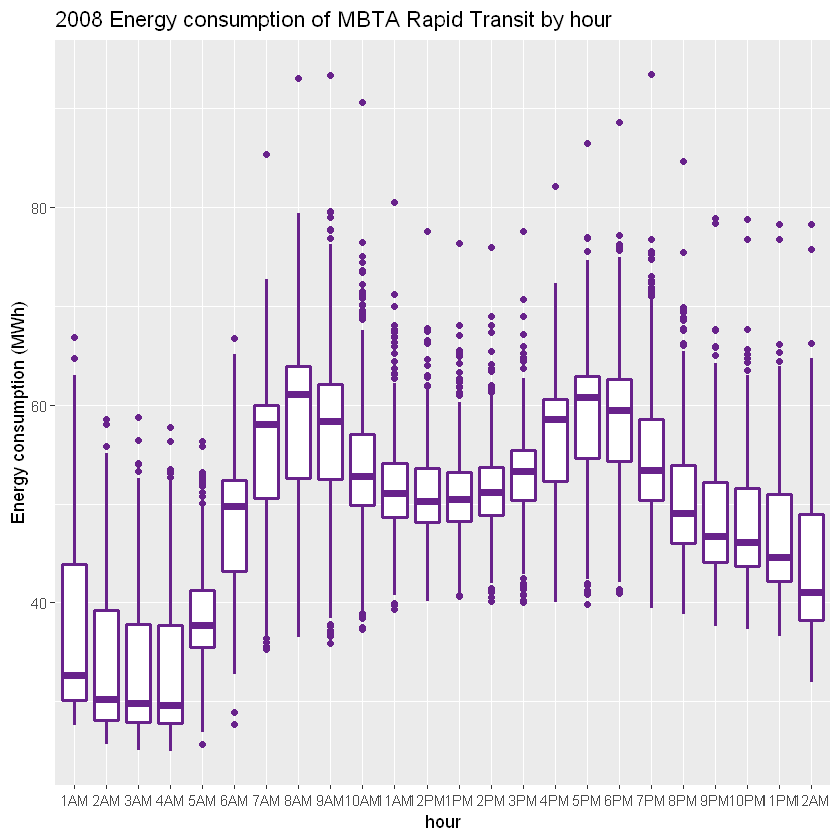

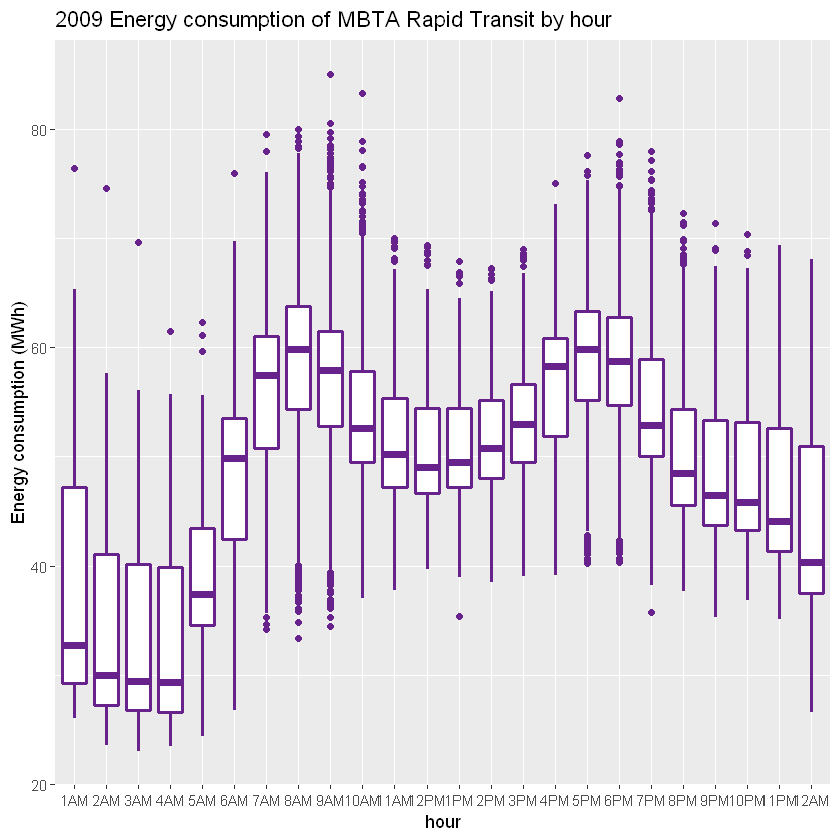

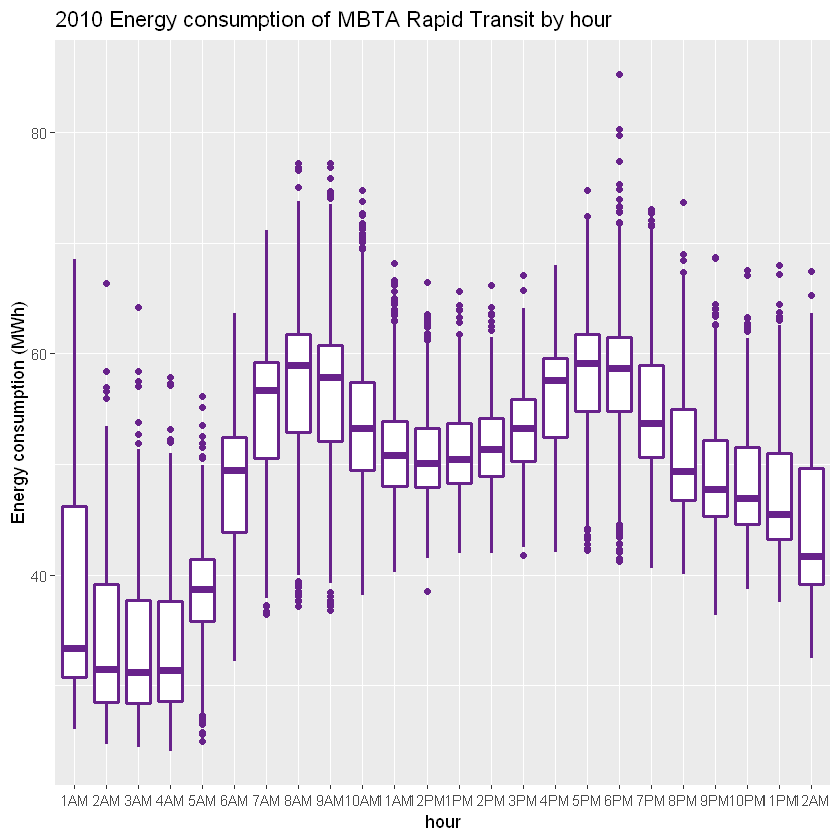

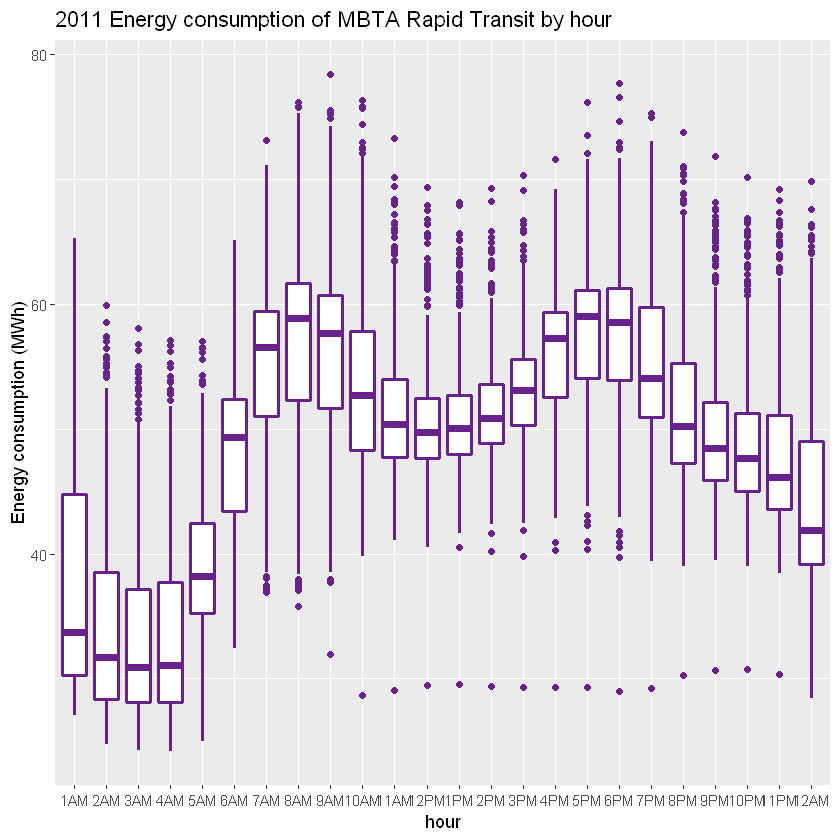

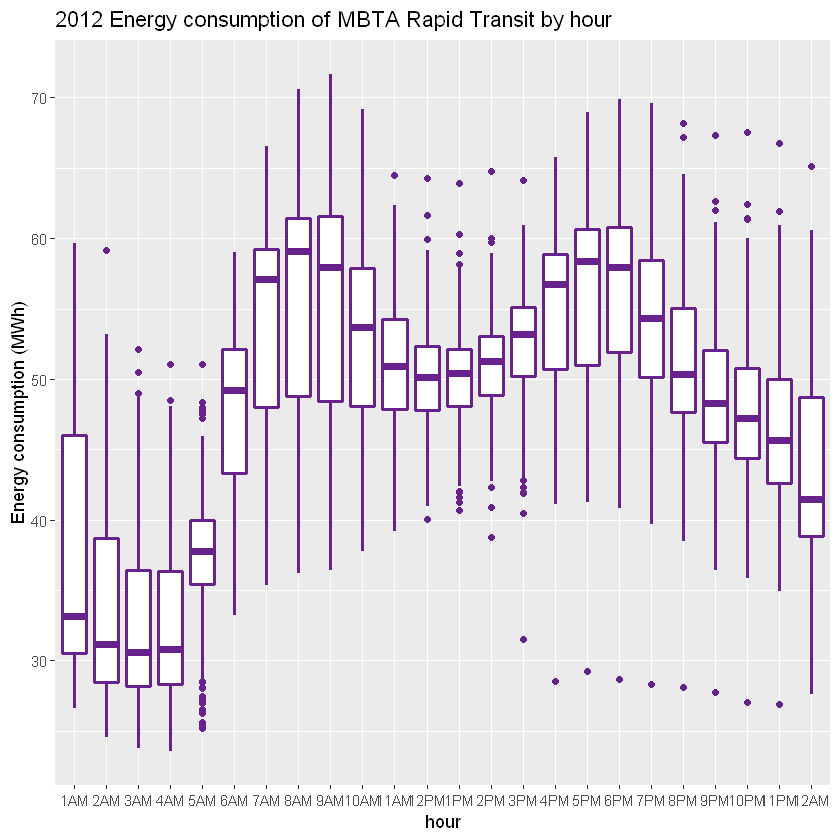

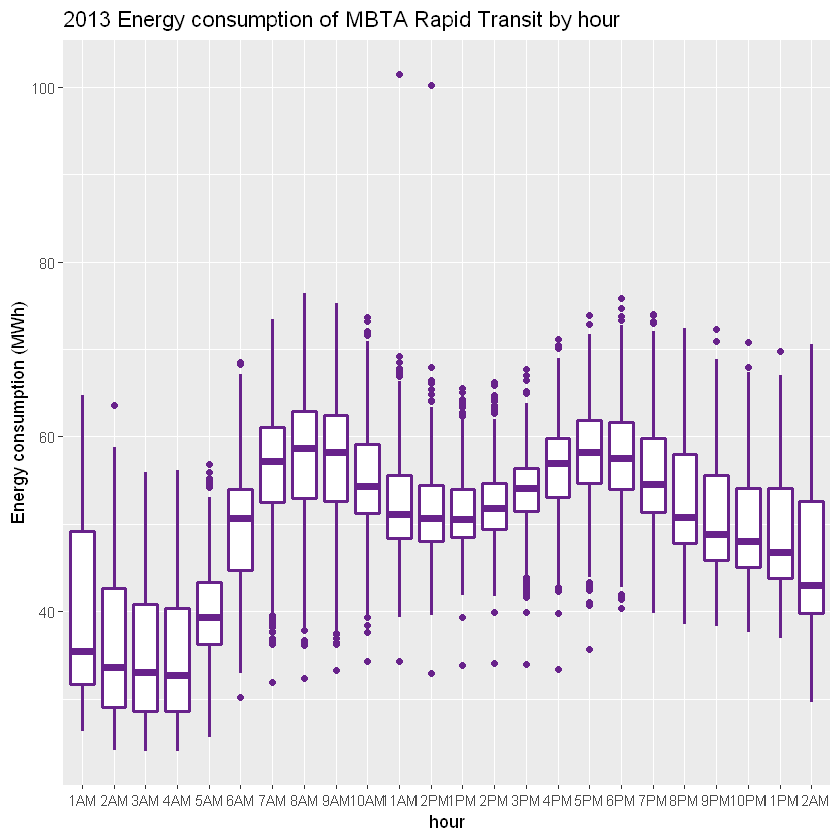

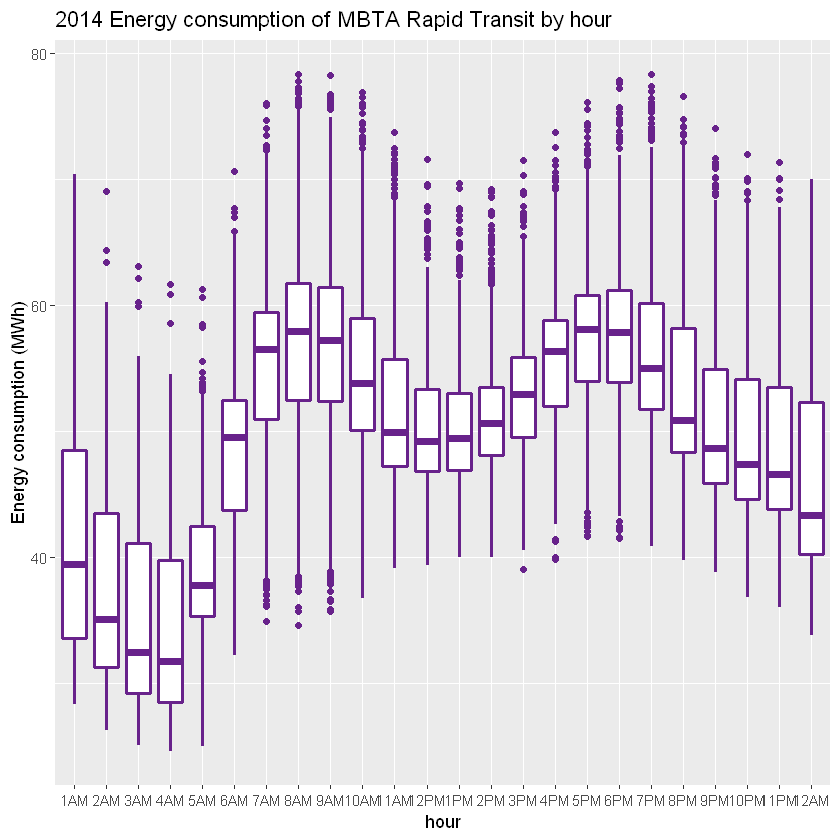

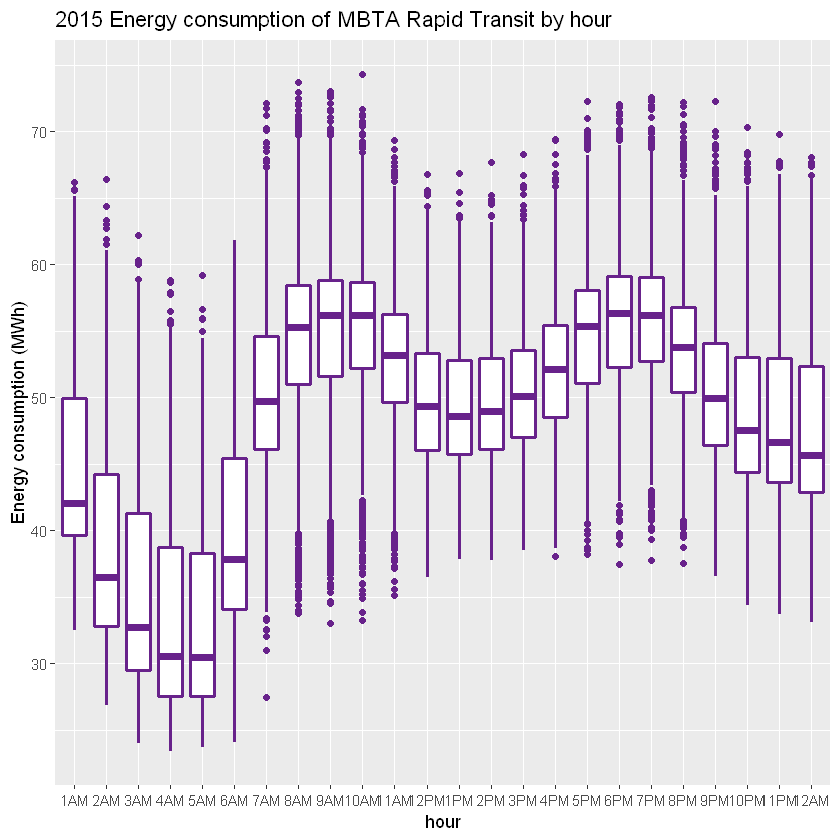

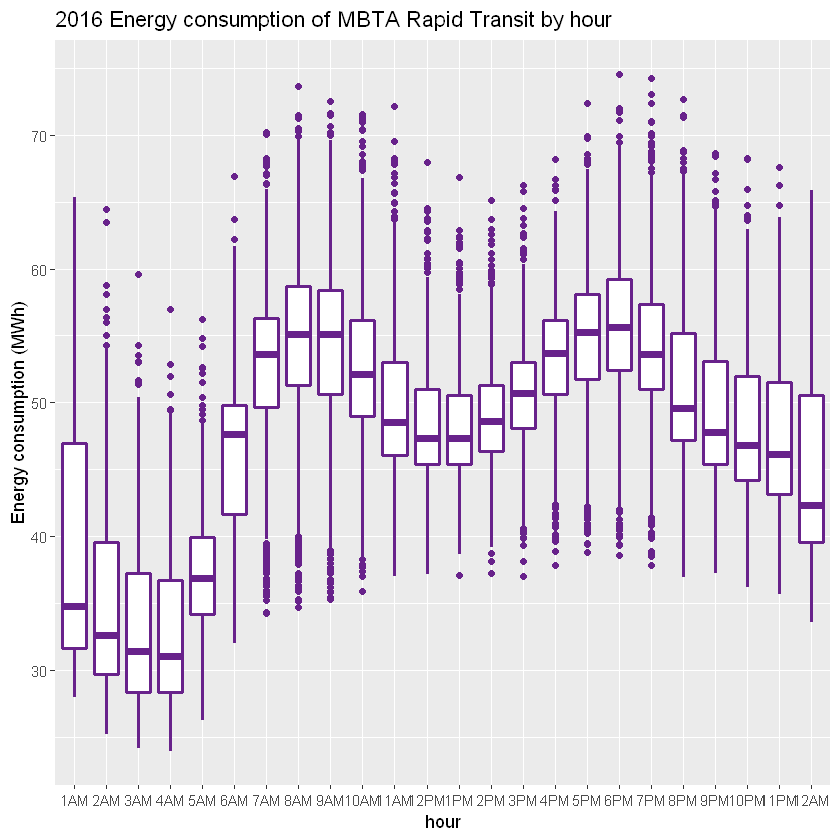

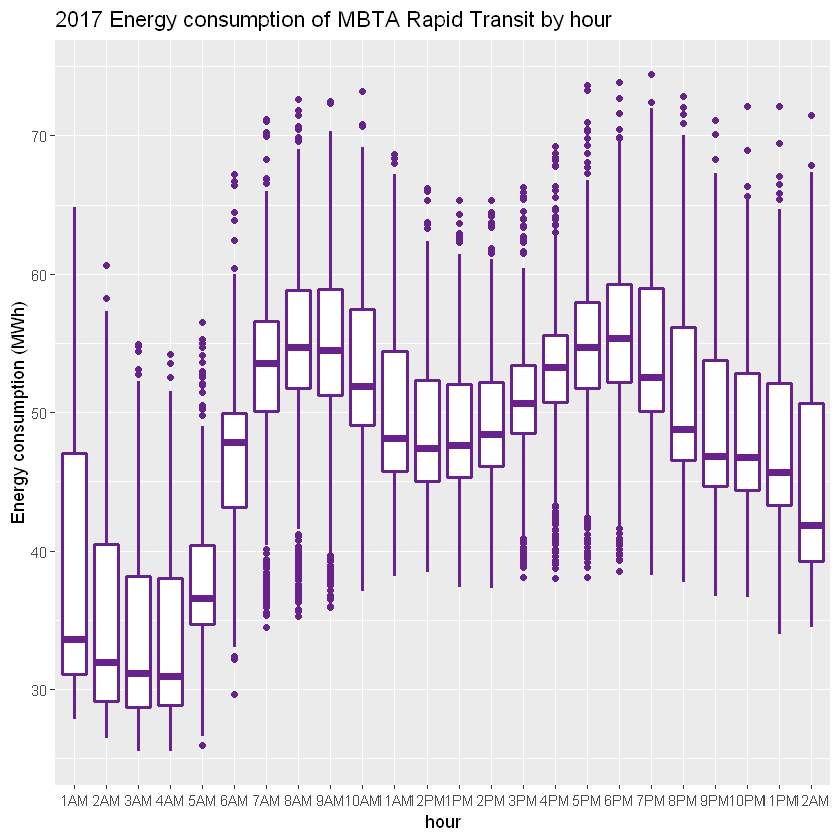

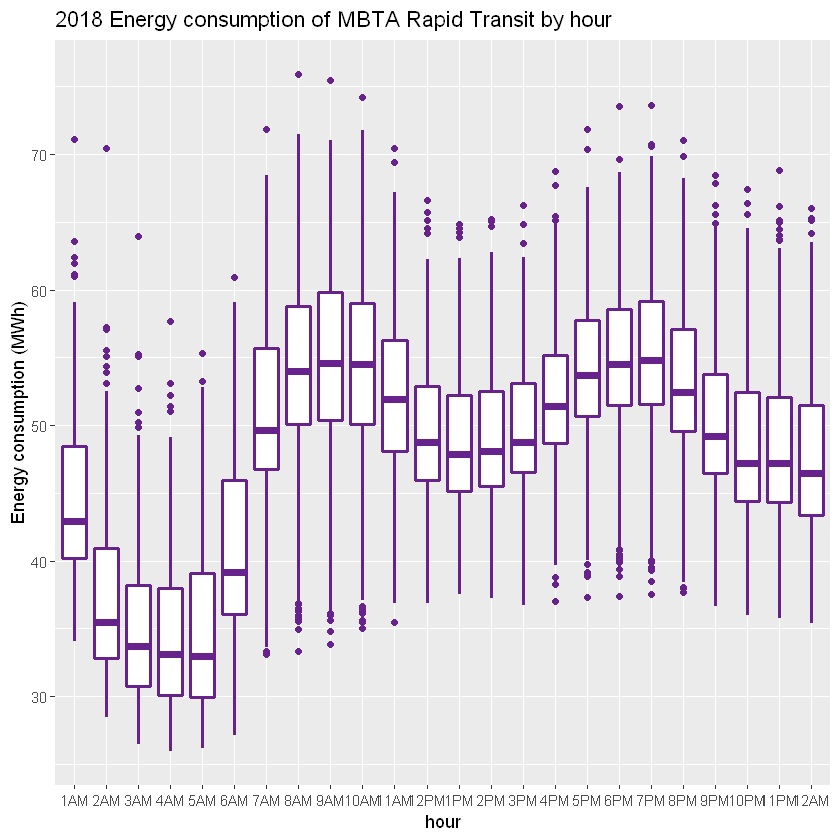

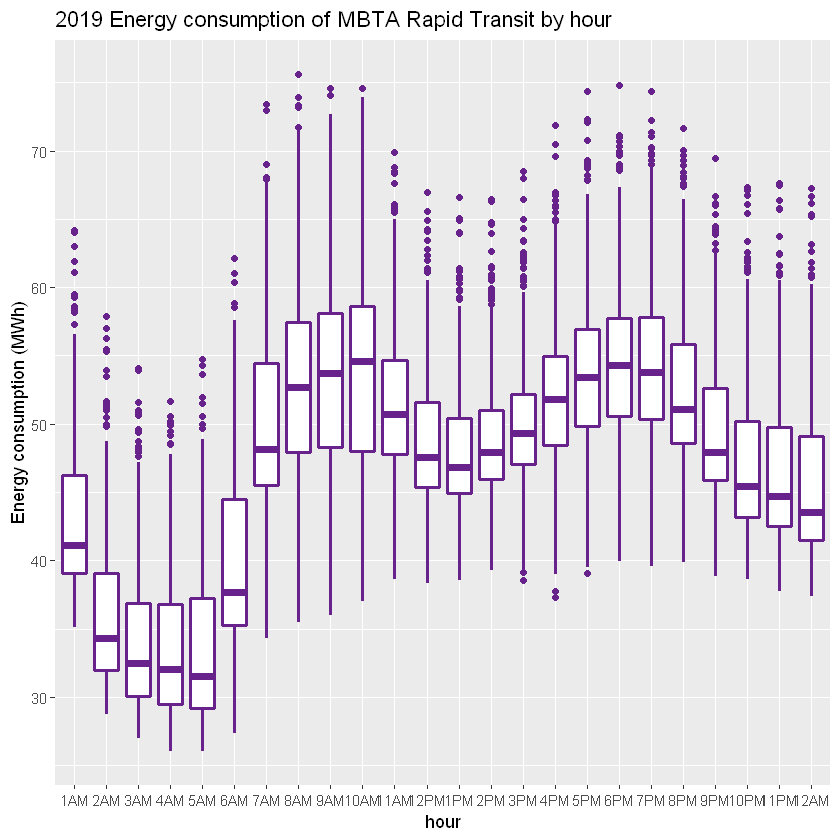

In [43]:
# generate hourly boxplots for each year
HDdata08=HDdata[HDdata$year==2008,] 
hour08_melt=melt (HDdata08,id.vars="year")
ggplot()+geom_boxplot(data=hour08_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2008 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

HDdata09=HDdata[HDdata$year==2009,]
hour09_melt=melt (HDdata09,id.vars="year")
ggplot()+geom_boxplot(data=hour09_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2009 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour")

HDdata10=HDdata[HDdata$year==2010,]
hour10_melt=melt (HDdata10,id.vars="year")
ggplot()+geom_boxplot(data=hour10_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2010 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

HDdata11=HDdata[HDdata$year==2011,]
hour11_melt=melt (HDdata11,id.vars="year")
ggplot()+geom_boxplot(data=hour11_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2011 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour")

HDdata12=HDdata[HDdata$year==2012,]
hour12_melt=melt (HDdata12,id.vars="year")
ggplot()+geom_boxplot(data=hour12_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2012 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

HDdata13=HDdata[HDdata$year==2013,]
hour13_melt=melt (HDdata13,id.vars="year")
ggplot()+geom_boxplot(data=hour13_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2013 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)", x = "hour") 
HDdata14=HDdata[HDdata$year==2014,]
hour14_melt=melt (HDdata14,id.vars="year")
ggplot()+geom_boxplot(data=hour14_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2014 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

HDdata15=HDdata[HDdata$year==2015,]
hour15_melt=melt (HDdata15,id.vars="year")
ggplot()+geom_boxplot(data=hour15_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2015 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)", x = "hour") 

HDdata16=HDdata[HDdata$year==2016,]
hour16_melt=melt (HDdata16,id.vars="year")
ggplot()+geom_boxplot(data=hour16_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2016 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

HDdata17=HDdata[HDdata$year==2017,]
hour17_melt=melt (HDdata17,id.vars="year")
ggplot()+geom_boxplot(data=hour17_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2017 Energy consumption of MBTA Rapid Transit by hour", y = "Energy consumption (MWh)",x = "hour") 

HDdata18=HDdata[HDdata$year==2018,]
hour18_melt=melt(HDdata18,id.vars="year")
ggplot()+geom_boxplot(data=hour18_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2018 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)", x = "hour")

HDdata19=HDdata[HDdata$year==2019,]
hour19_melt=melt(HDdata19,id.vars="year")
ggplot()+geom_boxplot(data=hour19_melt,aes(x=variable,y=value,group=variable),size=1,colour="darkorchid4") +
labs(title = "2019 Energy consumption of MBTA Rapid Transit by hour",y = "Energy consumption (MWh)",x = "hour") 

In [19]:
head(wholedata_frame)

,X,WJ,Date,Year,Month,Day.of.Month,Day.of.Year,Hour.1,Hour.2,Hour.3,...,Hour.19,Hour.20,Hour.21,Hour.22,Hour.23,Hour.24,Total.Daily.Load,on.peak,off.peak,TAVG
,<int>,<dbl>,<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,1,0,2008-01-01,2008,1,1,1,0,0,0,...,0,0,0,0,0,0,0,NA,NA,34
2,2,0,2008-01-02,2008,1,2,2,0,0,0,...,0,0,0,0,0,0,0,NA,NA,21.5
3,3,0,2008-01-03,2008,1,3,3,0,0,0,...,0,0,0,0,0,0,0,NA,NA,10.5
4,4,0,2008-01-04,2008,1,4,4,0,0,0,...,0,0,0,0,0,0,0,NA,NA,20
5,5,1,2008-01-05,2008,1,5,5,0,0,0,...,0,0,0,0,0,0,0,NA,NA,34.5
6,6,1,2008-01-06,2008,1,6,6,0,0,0,...,0,0,0,0,0,0,0,NA,NA,41.5


# Hourly energy consumption box plot

In [7]:
box_melt = melt(wholedata_frame,id.vars = "Year",measure.vars = c(paste0("Hour.",1:24)))
box_melt$variable = as.numeric(gsub("Hour.", "",box_melt$variable))
box_melt$variable = factor(box_melt$variable,levels = c( "1", "2", "3", "4", "5", "6", "7", "8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24"))
box_melt$variable = as.numeric(box_melt$variable)
options(repr.plot.width = 60, repr.plot.height = 80)
png("../../figures/figures for report/Hourly box plot.png",height= 4000,width=6000,res=360)
ggplot(box_melt ,aes(x = as.factor(variable),y = value,color = "red")) + 
    geom_boxplot(size=1) + 
    ylim(24,90) +
     theme_bw()+
    labs(x = "Hour", y = "Energy (MWh)") +
    theme(axis.title = element_text(size = 25),
          axis.text = element_text(size = 20)) +
     #scale_x_datetime(date_labels = ("%I %p"),
                   # date_breaks = "1 hours") +
      guides(color= FALSE)
dev.off()

Warning message:
"Removed 858 rows containing non-finite values (stat_boxplot)."


png 
  2

In [325]:
png("../../figures/Hourly box plot.png",height= 6500,width=8500,res=360)
ggplot(box_melt ,aes(x = as.factor(variable),y = value,color = "red")) + 
    geom_boxplot(size=5) + 
    ylim(24,90) +
  theme_bw()+
    labs(x = "Hour", y = "Energy (MWh)") +
    theme(axis.title = element_text(size = 60),
          axis.text = element_text(size = 50)) +
     #scale_x_datetime(date_labels = ("%I %p"),
                   # date_breaks = "1 hours") +
      guides(color= FALSE)
dev.off()

Warning message:
"Removed 114 rows containing non-finite values (stat_boxplot)."


png 
  2

In [309]:
box_melt

Year,variable,value
<int>,<dbl>,<dbl>
2008,1,53.906
2008,1,48.805
2008,1,47.228
2008,1,47.830
2008,1,51.319
2008,1,48.019
2008,1,51.805
2008,1,55.433
2008,1,56.009


In [216]:
box_melt = box_melt %>% 
  mutate(Time = str_c(variable,"00", sep = ':'))

In [183]:
box_melt$variable = box_melt$variable -1

In [103]:
box_melt_peak_1= box_melt[(box_melt$variable >=7 & box_melt$variable <= 10),
#                           & box_melt$variable >=16 & box_melt$variable <= 18),
#                          &
#                          #(box_melt$variable >=16 & box_melt$variable <= 18),
                        ]

In [104]:
box_melt_peak_2 = box_melt[(box_melt$variable >=16 & box_melt$variable <= 18),]

In [106]:
box_melt_peak_3 = box_melt[(box_melt$variable >=2 & box_melt$variable <= 4),]

In [107]:
box_melt_peak = rbind(box_melt_peak_1,box_melt_peak_2)

In [111]:
mean(box_melt_peak_1$value)
mean(box_melt_peak_2$value)
mean(box_melt_peak_3$value)
mean(box_melt$value)

[1] 53.96199

[1] 55.09651

[1] 34.37843

[1] 48.15182

In [110]:
mean(box_melt_peak_3$value)

[1] 34.37843

In [65]:
box_melt_peak_agg = aggregate(box_melt_peak$value,list(box_melt_peak$variable),sum)

In [67]:
sum(box_melt_peak_agg$x)/nrow(box_melt)

[1] 8.934957

Warning message:
"Removed 2 rows containing missing values (position_stack)."


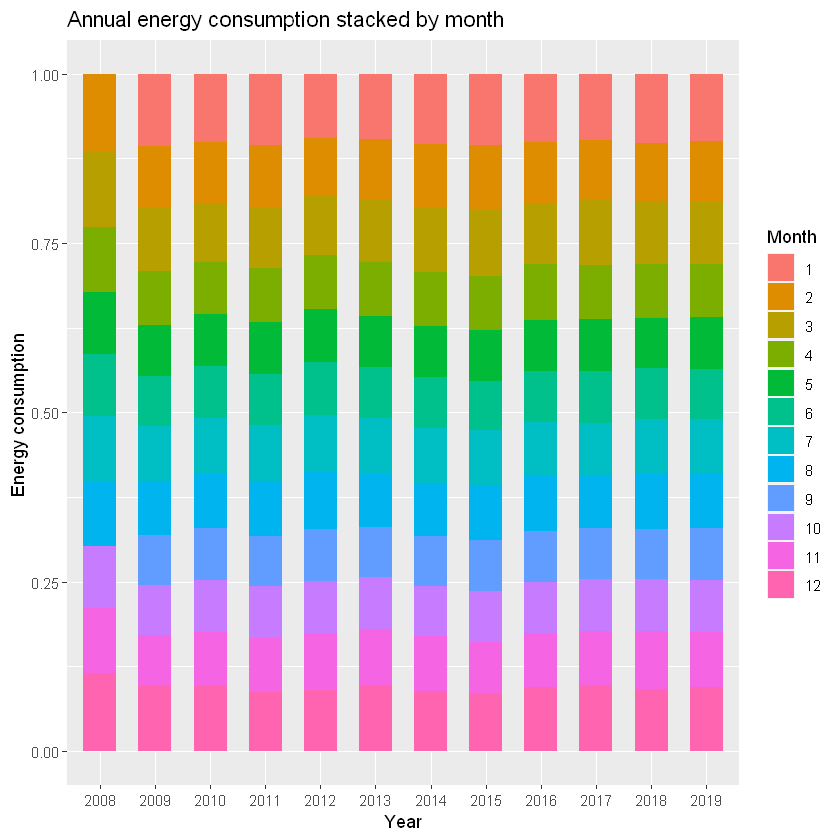

In [3]:
#generate stacked plot by month
Hourstacked=aggregate(wholedata_frame$Total.Daily.Load,list(wholedata_frame$Year,wholedata_frame$Month),sum)
ggplot(Hourstacked,aes(x=factor(Group.1),y=x,fill=factor(Group.2)))+geom_col(position = "fill", width = 0.6)+
labs(title = "Annual energy consumption stacked by month", y = "Energy consumption ",x = "Year", fill="Month") 